# Visualization

In [1]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
import matplotlib as plt
#data=pd.read_excel("Data.xlsx")
#read the processed data after data cleaning
data= pd.read_csv("..\\data\\NAdone.csv")

In [2]:
data.head()


,Unnamed: 0,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
0,0,Airtel,Indoor,4G,3,Satisfactory,12.998502,77.672437,Karnataka,8807.910,-94.86,2591.08,-94.840,61130704.0,75.36,1248.0,191791.0
1,1,Vodafone,Indoor,4G,1,Call Dropped,23.554190,72.620110,Gujarat,6862.552,-91.96,4671.48,-91.920,60439692.0,78.03,842.5,196024.0
2,2,Airtel,Indoor,3G,1,Call Dropped,11.327329,76.749743,Tamil Nadu,1178.410,-85.03,968.58,-85.470,72147030.0,80.33,998.0,130060.0
3,3,Airtel,Indoor,4G,3,Satisfactory,22.279660,73.149369,Gujarat,5694.480,-89.39,2515.34,-89.515,60439692.0,78.03,842.5,196024.0
4,4,Airtel,Travelling,4G,3,Satisfactory,18.546344,73.819090,Maharashtra,10804.560,-94.05,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0


In [3]:
data = data.drop('Unnamed: 0',axis=1)

In [4]:
data.loc[1,'Average Signal Strength Download']

-91.96

In [5]:
data_new = data[['Average Signal Strength Download','Average Signal Strength Upload','Average Data Speed Download','Average Data Speed Upload']]
from scipy import stats
data = data[(np.abs(stats.zscore(data_new)) < 3).all(axis=1)]

In [6]:
data.describe()

,Rating,Latitude,Longitude,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
count,30715.000000,30715.000000,30715.000000,30715.000000,30715.000000,30715.000000,30715.000000,3.071500e+04,30715.000000,30715.000000,30715.000000
mean,3.528276,20.991298,77.616981,13407.665224,-87.629338,3943.405456,-87.835678,9.344390e+07,74.511139,1222.469894,221914.002572
std,1.480135,4.898215,4.894220,9649.722909,5.948032,2019.891995,5.693966,4.116169e+07,12.460416,462.422109,92989.608227
min,1.000000,8.255166,69.017391,0.000000,-103.200000,220.940000,-103.200000,2.535146e+07,10.980000,143.000000,38863.000000
25%,2.000000,18.547915,73.727236,5191.980000,-92.580000,2680.020000,-93.000000,6.113070e+07,70.600000,998.000000,155707.000000
50%,4.000000,20.301572,76.942373,10804.560000,-86.800000,4130.460000,-86.920000,9.127612e+07,78.030000,1248.000000,243286.000000
75%,5.000000,25.263912,80.194121,20707.870000,-84.740000,5107.230000,-84.949000,1.123743e+08,82.340000,1455.500000,307713.000000
max,5.000000,32.427797,95.619158,32444.069600,-63.000000,9720.680000,-65.833000,1.998123e+08,94.000000,3055.000000,342239.000000


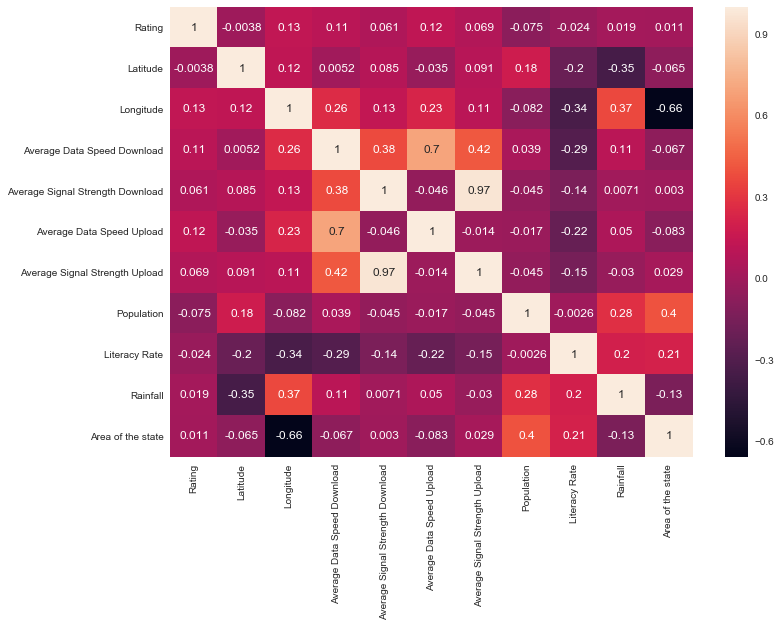

In [22]:
Var_Corr = data.corr()

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig = sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
fig = fig.get_figure()
#fig.savefig("..\\plots\\corr_matrix.png")

__Inference - 
1- Area of the state has negative correlation with the longitude, this is verified as the area of eastern Indian states gets smaller as comared to the west ones.__

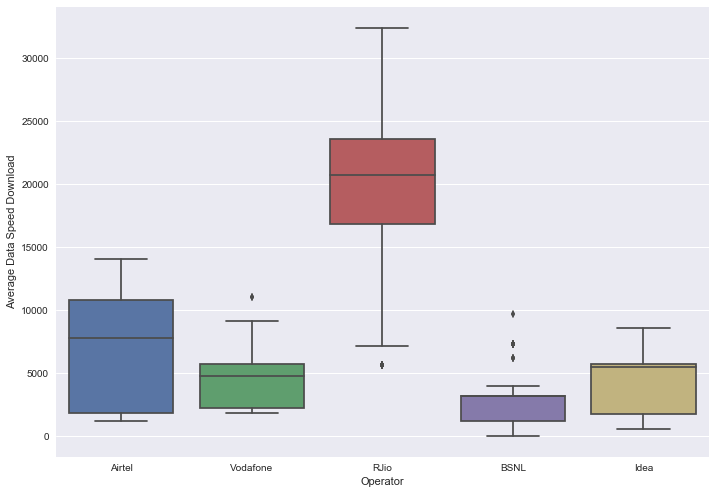

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="Operator", y="Average Data Speed Download", data=data)
fig = ax.get_figure()
#fig.savefig("..\\plots\\img1.png")

__Rjio has much greater Average Data speed Download than other networks.__

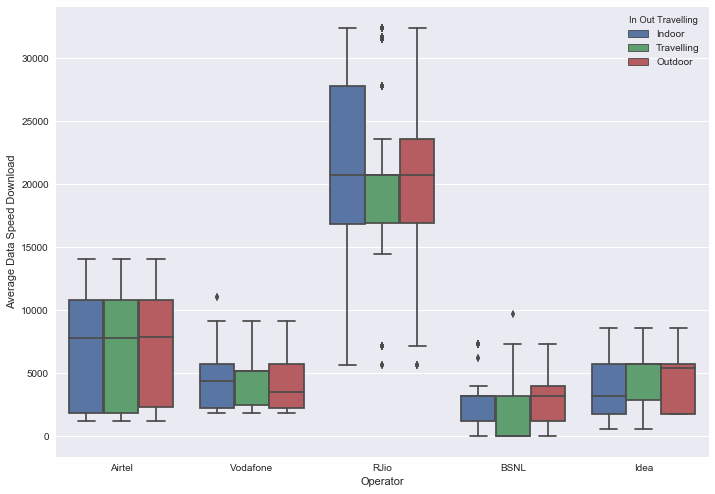

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="Operator", y="Average Data Speed Download",hue ="In Out Travelling" , data=data)
fig = ax.get_figure()
#fig.savefig("..\\plots\\img2.png")

__Rjio has much greater Average Data speed Download than other networks in all aspects of in-out travelling.__

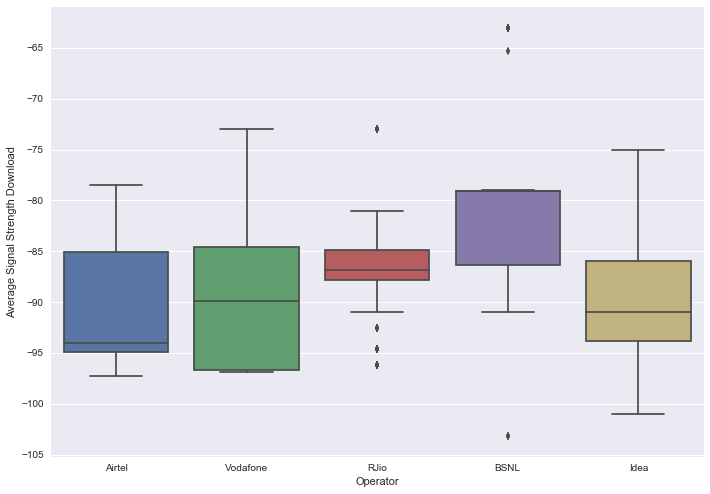

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="Operator", y="Average Signal Strength Download", data=data)
fig = ax.get_figure()
#fig.savefig("..\\plots\\img3.png")

__Average Signal Strength Download is best for BSNL.__

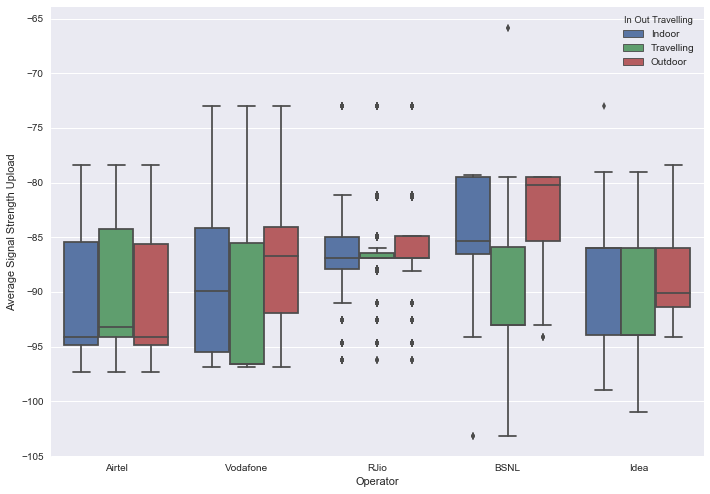

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="Operator", y="Average Signal Strength Upload",hue ="In Out Travelling" , data=data)
fig = ax.get_figure()
#fig.savefig("..\\plots\\img4.png")

__BSNL has the best Signal strength Upload.__

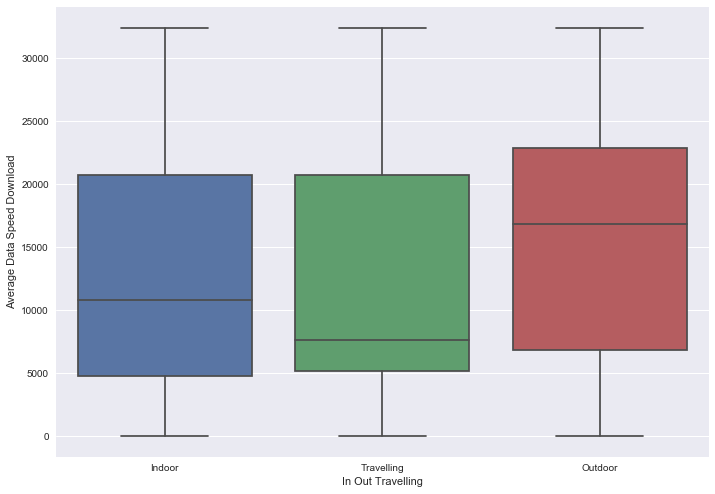

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="In Out Travelling", y="Average Data Speed Download", data=data)
fig = ax.get_figure()
#fig.savefig("..\\plots\\img5.png")

__Average Data Speed Download comes out to be best when in outdoor.__

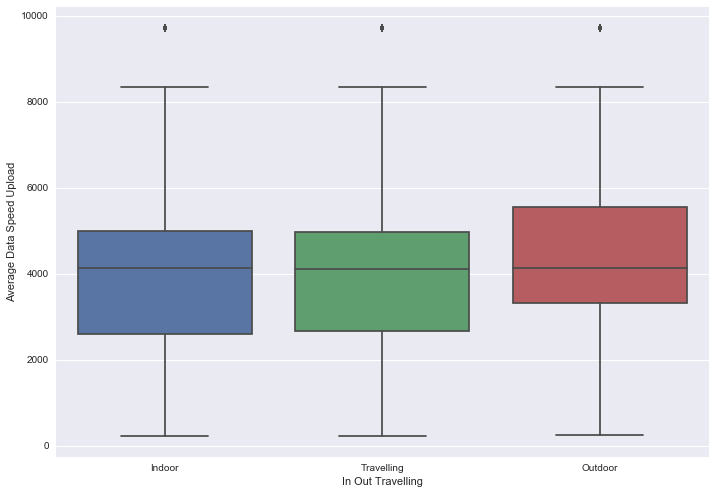

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="In Out Travelling", y="Average Data Speed Upload", data=data)
fig = ax.get_figure()
#fig.savefig("..\\plots\\img6.png")

__Inference : The above graph depicts that the Average Data Speed Upload is best in Outdoor region since both the Upper an Lower Quartiles are higher that Indoor and Travelling.
Although the means are very similar.__

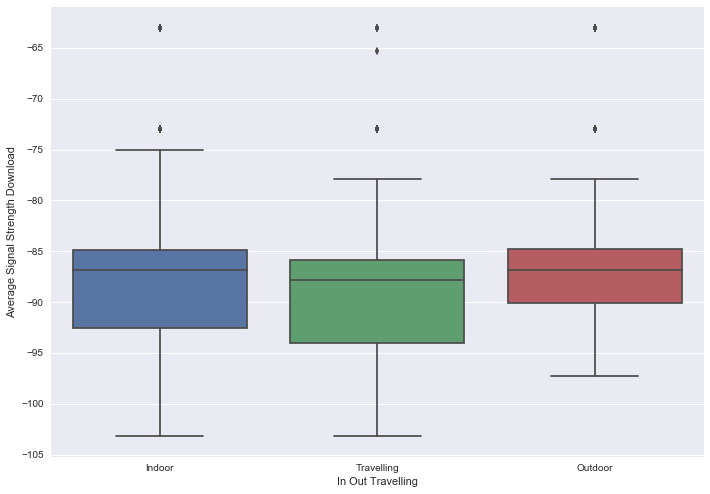

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="In Out Travelling", y="Average Signal Strength Download", data=data)
fig = ax.get_figure()
fig.savefig("..\\plots\\img7.png")

__Inference : The above graphs depicts the need of outlier removal in  Average Signal Strength Download__

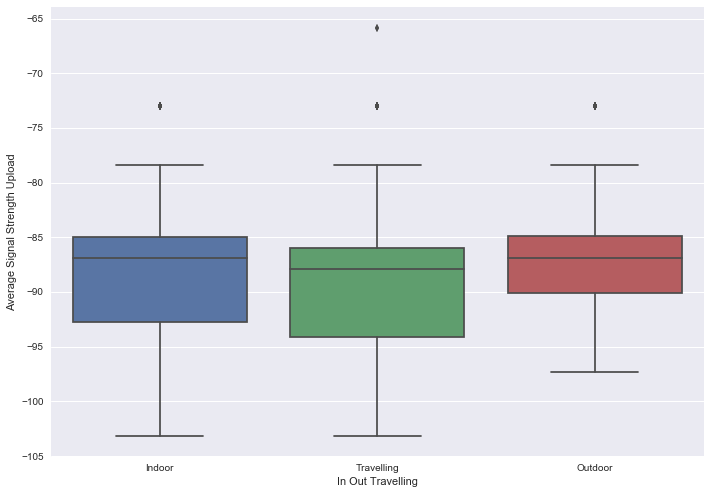

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="In Out Travelling", y="Average Signal Strength Upload", data=data)
fig = ax.get_figure()
#fig.savefig("..\\plots\\img8.png")

__Inference : The above graphs shows that the Average Signal Strength Upload does not vary much with respect to the user being Indoor, Outdoor or Travelling.
It also depicts need of outlier removal  Average Signal Strength Upload.__

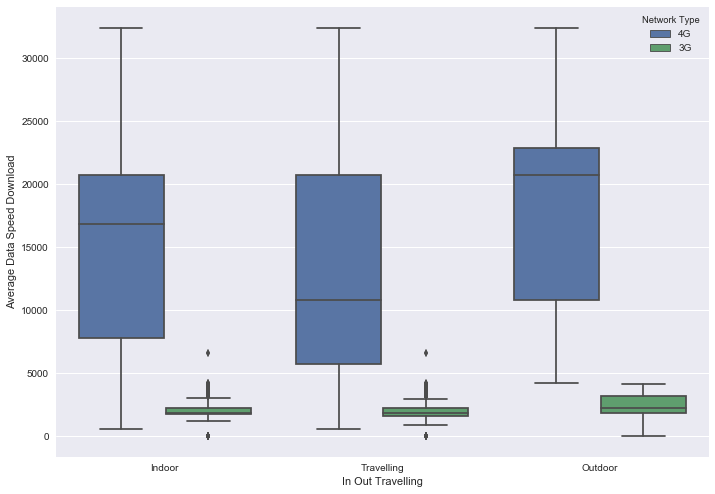

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="In Out Travelling", y="Average Data Speed Download",hue = "Network Type", data=data)
fig = ax.get_figure()
#fig.savefig("..\\plots\\img9.png")

__Inference: In the above graph the size and position of the boxes is bigger and higher in case of the 4G networks than 3G or any other networks, highlights that fact that 4G Network is far more superior as compared to 3G and other networks.__

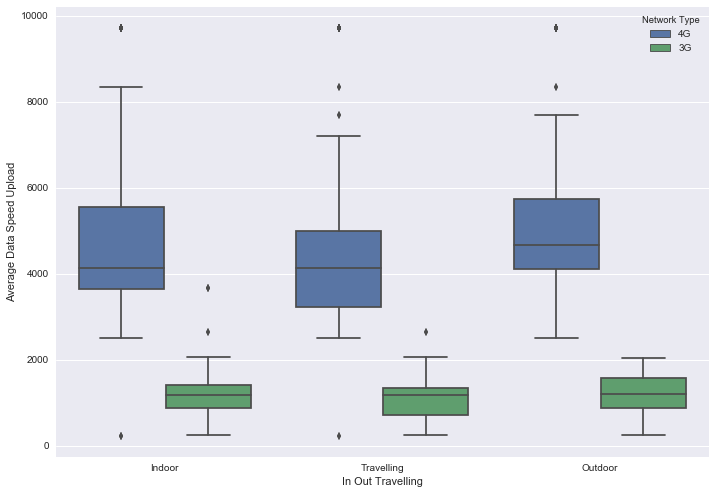

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="In Out Travelling", y="Average Data Speed Upload",hue = "Network Type", data=data)
fig = ax.get_figure()
#fig.savefig("..\\plots\\img10.png")

__Inference: In the above graph the size and position of the boxes is bigger and higher in case of the 4G networks than 3G or any other networks, highlights that fact that 4G Network is far more superior as compared to 3G and other networks.__

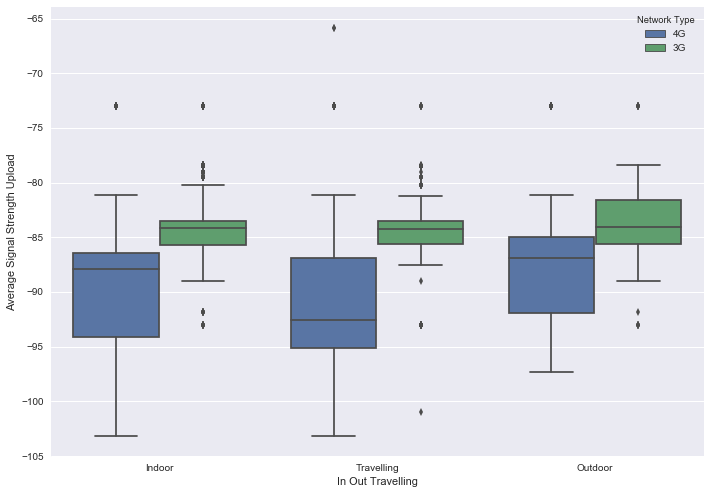

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="In Out Travelling", y="Average Signal Strength Upload",hue = "Network Type", data=data)
fig = ax.get_figure()
#fig.savefig("..\\plots\\img11.png")

__Inference : The mean of Average Signal Strength Upload is greater in all the cases of travelling, signifying that the 3G network infrastucture is  much more advanced than the 4G infrasture in India.__

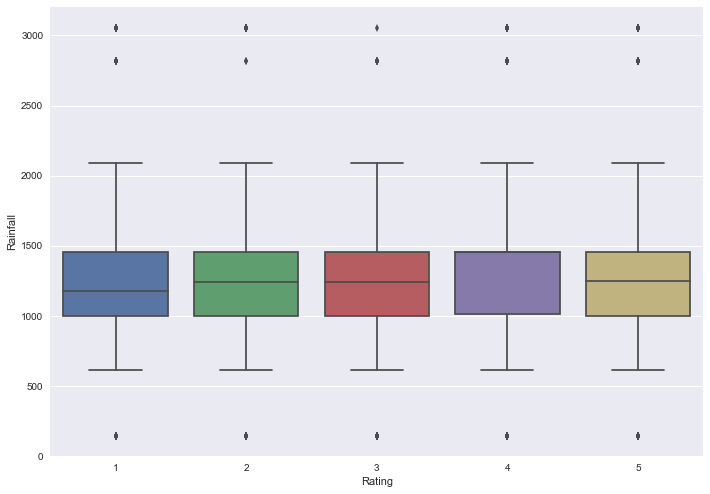

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="Rating", y="Rainfall", data=data)
fig = ax.get_figure()
#fig.savefig("..\\plots\\img12.png")

Inference: the call ratings are not affected by the amount of rainfall in the states.(because the means of the box plots are not much different from one another)

# Scatter Plots

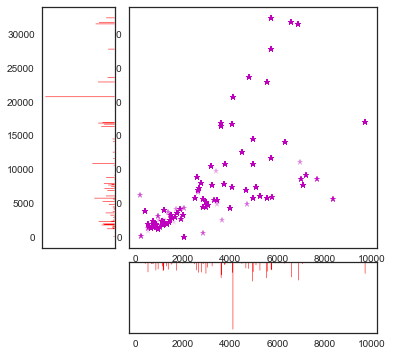

In [21]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
x = data['Average Data Speed Upload']
y = data['Average Data Speed Download']
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'm*', markersize=7, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 400, histtype='stepfilled',
            orientation='vertical', color='red')
x_hist.invert_yaxis()

y_hist.hist(y, 400, histtype='stepfilled',
            orientation='horizontal', color='red')
y_hist.invert_xaxis()

#plt.savefig("..\\plots\\scatter1.png")

Inference : The following scatter plot shows the realtionship between Dataspeed Upload and Dataspeed Download.

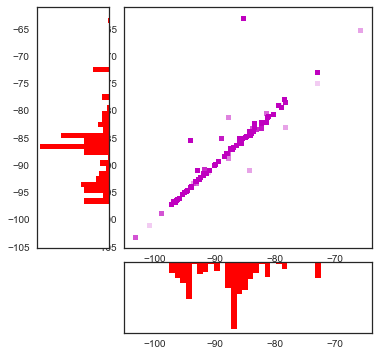

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
x = data['Average Signal Strength Upload']
y = data['Average Signal Strength Download']
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ms', markersize=5, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='red')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='red')
y_hist.invert_xaxis()
#plt.savefig("..\\plots\\scatter2.png")

The figure above shows the relation between Average Signal Strength Download and Average Signal Strength Upload is linear and they are highly correlated.

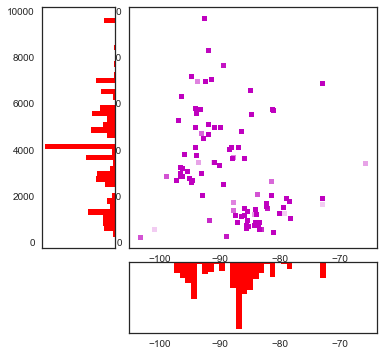

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
x = data['Average Signal Strength Upload']
y = data['Average Data Speed Upload']
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ms', markersize=5, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='red')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='red')
y_hist.invert_xaxis()
#plt.savefig("..\\plots\\scatter3.png")

The scatter plot above inicates a weak realtionship between between Average Signal Strength Upload and Average Data Speed Upload 

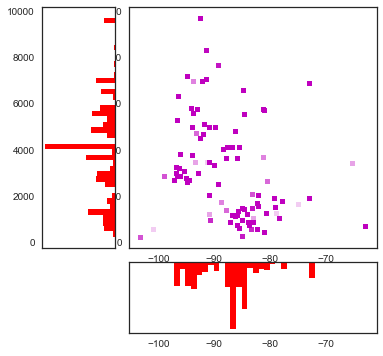

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
x = data['Average Signal Strength Download']
y = data['Average Data Speed Upload']
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ms', markersize=5, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='red')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='red')
y_hist.invert_xaxis()
#plt.savefig("..\\plots\\scatter4.png")

The scatter plot above inicates a weak realtionship between between Average Signal Strength Download and Average Data Speed Upload 

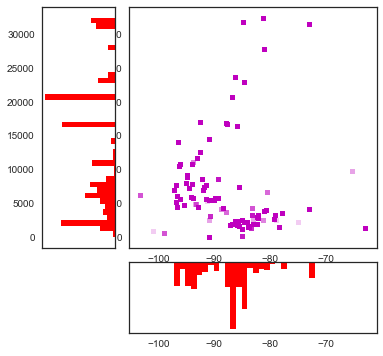

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
x = data['Average Signal Strength Download']
y = data['Average Data Speed Download']
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ms', markersize=5, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='red')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='red')
y_hist.invert_xaxis()
#plt.savefig("..\\plots\\scatter5.png")

The scatter plot above indicates a weak realtionship  between Average Signal Strength Download and Average Data Speed Download 

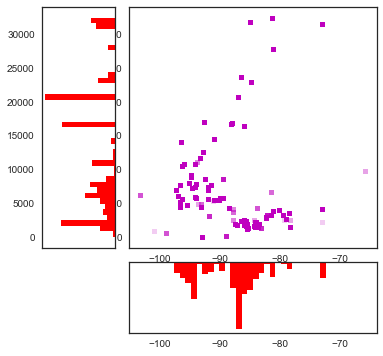

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
x = data['Average Signal Strength Upload']
y = data['Average Data Speed Download']
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ms', markersize=5, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='red')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='red')
y_hist.invert_xaxis()
#plt.savefig("..\\plots\\scatter6.png")

The scatter plot above indicates a weak realtionship between Average Signal Strength pwnload and Average Data Speed Download

In [26]:
data_airtel = data[data.Operator == "Airtel"]
data_rjio = data[data.Operator == "RJio"]
data_idea = data[data.Operator == "Idea"]
data_bsnl = data[data.Operator == "BSNL"]
data_vodafone = data[data.Operator == "Vodafone"]

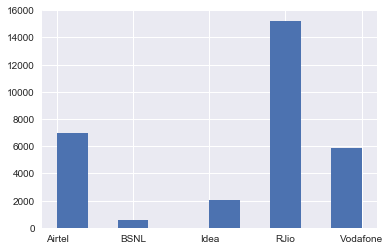

In [61]:
plt.hist(data.Operator,histtype='bar')
#plt.savefig("..\\plots\\bar1.png")

The above grapgh shows that Jio is the most subscribed telecom operator among the users.

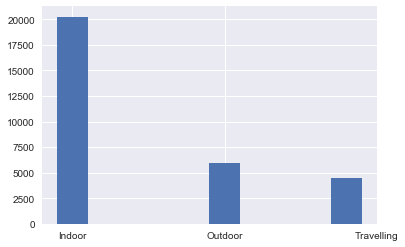

In [62]:
plt.hist(data['In Out Travelling'],align = 'left',histtype='bar')
#plt.savefig("..\\plots\\bar2.png")

This imloes that majority of the calls were made indoors

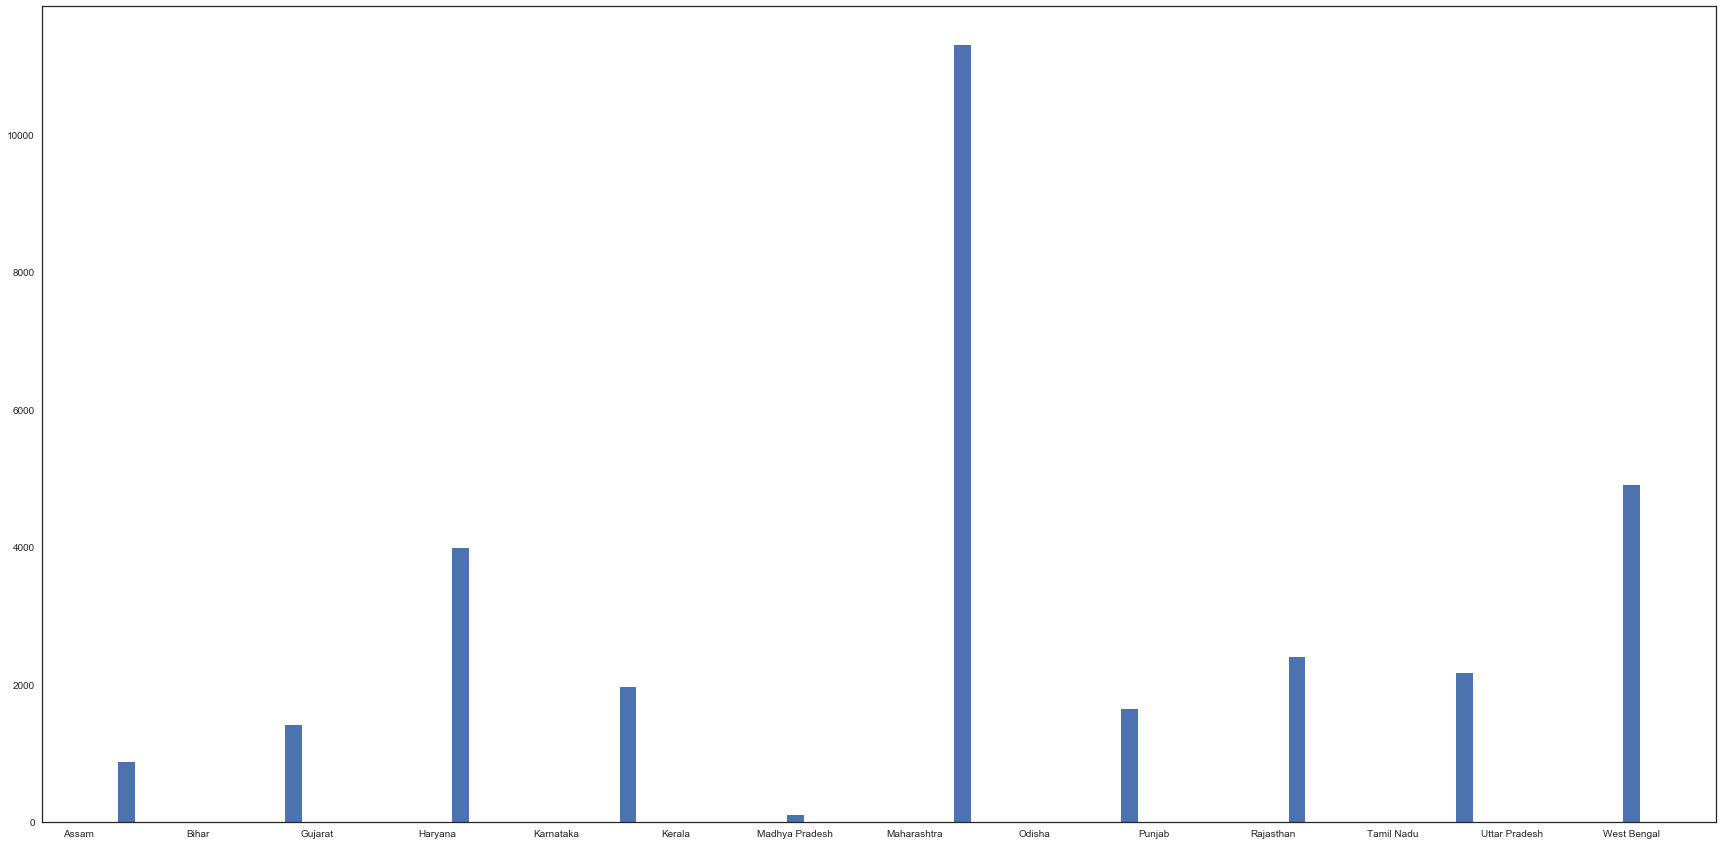

In [29]:
plt.figure(figsize=(30,15))
plt.hist(data['State Name'],histtype='bar',align = 'right',rwidth = 0.1)
#plt.savefig("..\\plots\\bar3.png")

The above figure shows that Maharashtra has maximum number os users.

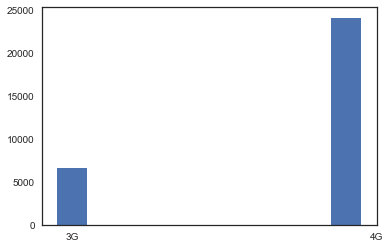

In [30]:
plt.hist(data['Network Type'],align = 'left',histtype='bar')
#plt.savefig("..\\plots\\bar4.png")

The above graph shows that Majority of the users use $G network.

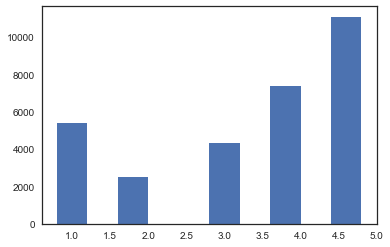

In [31]:
plt.hist(data['Rating'],align = 'left',histtype='bar')
#plt.savefig("..\\plots\\bar5.png")

Inference: Most of the calls were rated 5, implying good call quality 

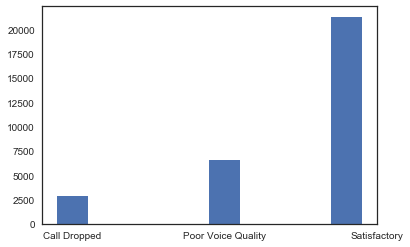

In [32]:
plt.hist(data['Call Drop Category'],align = 'left',histtype='bar')
#plt.savefig("..\\plots\\bar6.png")

The above plot implies that most of the calls done by the customers were satisfactory this verifis the ratings plot also.

# OPERATORWISE ANALYSIS

## Airtel

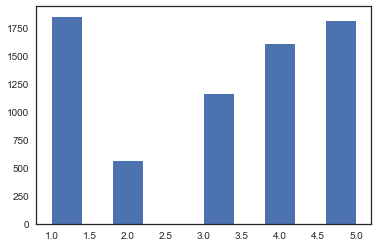

In [33]:

plt.hist(data_airtel.Rating,align = 'mid',histtype='bar')
#plt.savefig("..\\plots\\bar7.png")

The above plot depicts that the Airtel some users like the operator alot while others simply dont.

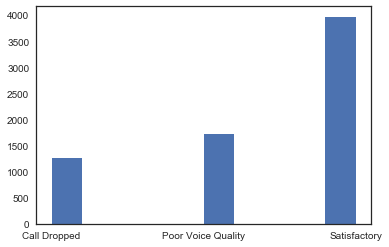

In [34]:
plt.hist(data_airtel['Call Drop Category'],align = 'mid',histtype='bar')
#plt.savefig("..\\plots\\bar8.png")

This plot depictst that most of the calls were satisfacotry without being dropped 

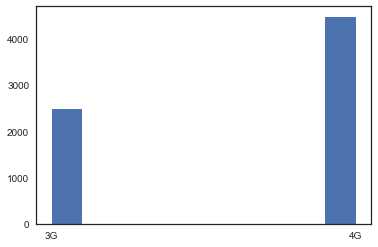

In [35]:
plt.hist(data_airtel['Network Type'],align = 'mid',histtype='bar')
#plt.savefig("..\\plots\\bar9.png")

The above plot shows that mojority of Airtel users are using 4g services

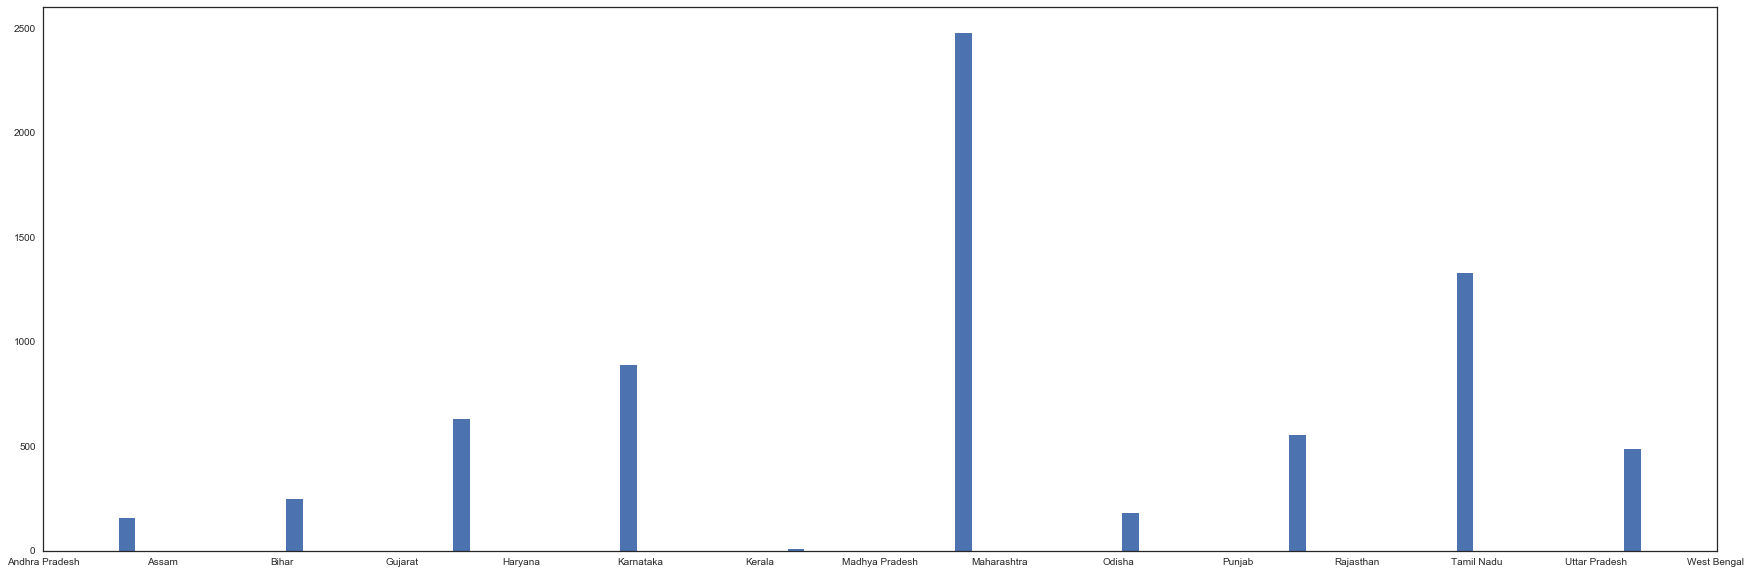

In [36]:
plt.figure(figsize=(30,10))
plt.hist(data_airtel['State Name'],histtype='bar',align = 'mid',rwidth = 0.1)
#plt.savefig("..\\plots\\bar10.png")

The above plot shows that Airtel has maximum users in Maharashtra followed by Tamil Nadu

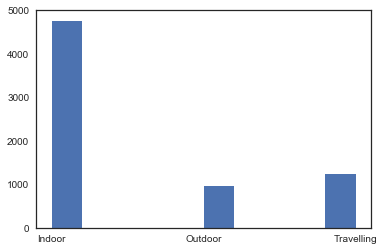

In [37]:
plt.hist(data_airtel['In Out Travelling'],align = 'mid',histtype='bar')
#plt.savefig("..\\plots\\bar11.png")

The above plot depicts that majority of the calls made by the Airtel users were indoors while calling.

## Idea

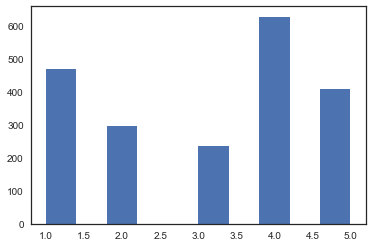

In [38]:
plt.hist(data_idea.Rating,histtype='bar')
#plt.savefig("..\\plots\\bar12.png")

The above plot depists that majotiry of Idea users have rated ther services to be 4 which shows there is still scope for improvement 

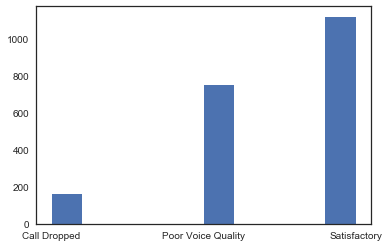

In [39]:
plt.hist(data_idea['Call Drop Category'],histtype='bar')
#plt.savefig("..\\plots\\bar13.png")

The above plot shows that majority of the calls were satifactory 

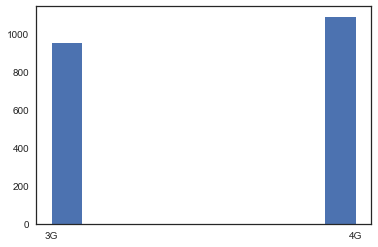

In [40]:
plt.hist(data_idea['Network Type'],histtype='bar')
#plt.savefig("..\\plots\\bar14.png")

The above plot shows that there is not muh difference idea's users base has a significant proportion of 3G users as well as 4G

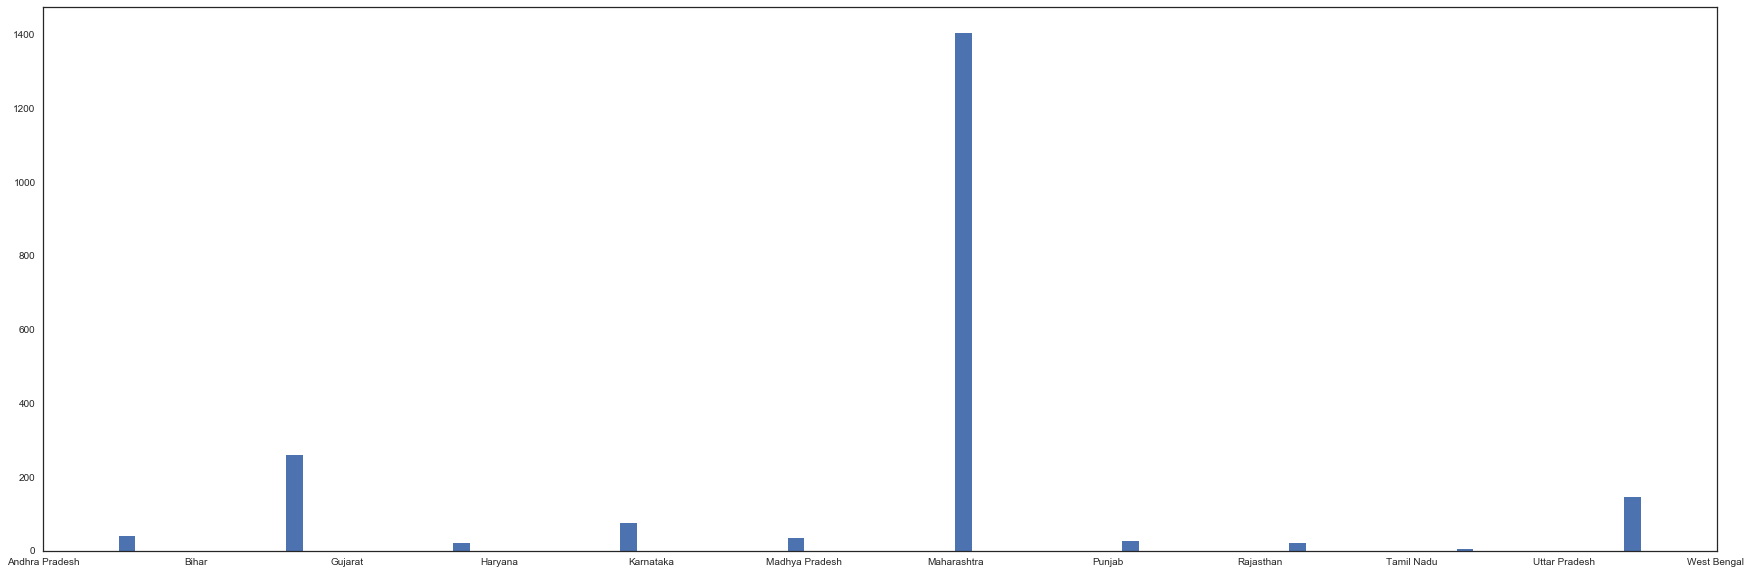

In [41]:
plt.figure(figsize=(30,10))
plt.hist(data_idea['State Name'],histtype='bar',align = 'mid',rwidth = 0.1)
#plt.savefig("..\\plots\\bar15.png")

The above plot depicts that majority of idea users are in Maharashtra.

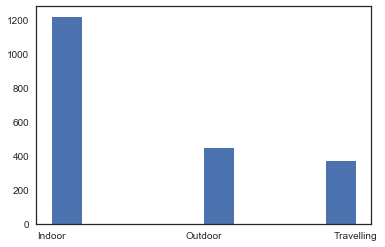

In [42]:
plt.hist(data_idea['In Out Travelling'],histtype='bar')
#plt.savefig("..\\plots\\bar16.png")

The above plot depicts that majority of the calls made by the Idea users were indoors while calling.

## RJIO

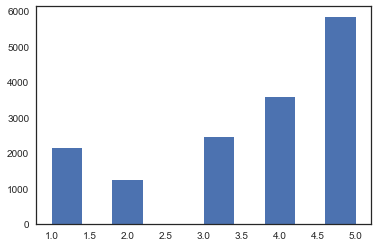

In [43]:
plt.hist(data_rjio.Rating,histtype='bar')
#plt.savefig("..\\plots\\bar17.png")

The above plot depicts majority if users are satisfied by the services provided by Jio.

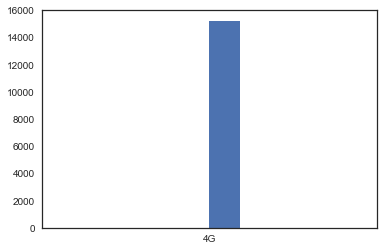

In [44]:
plt.hist(data_rjio['Network Type'],histtype='bar')
#plt.savefig("..\\plots\\bar18.png")

The above plot depicts that Jio only has 4G users and has not entered 3G market yet

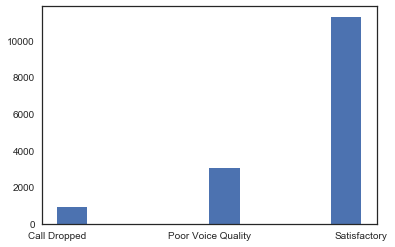

In [45]:
plt.hist(data_rjio['Call Drop Category'],histtype='bar')
#plt.savefig("..\\plots\\bar19.png")

The above plot shows that majority of the users had satisfactory calling experience

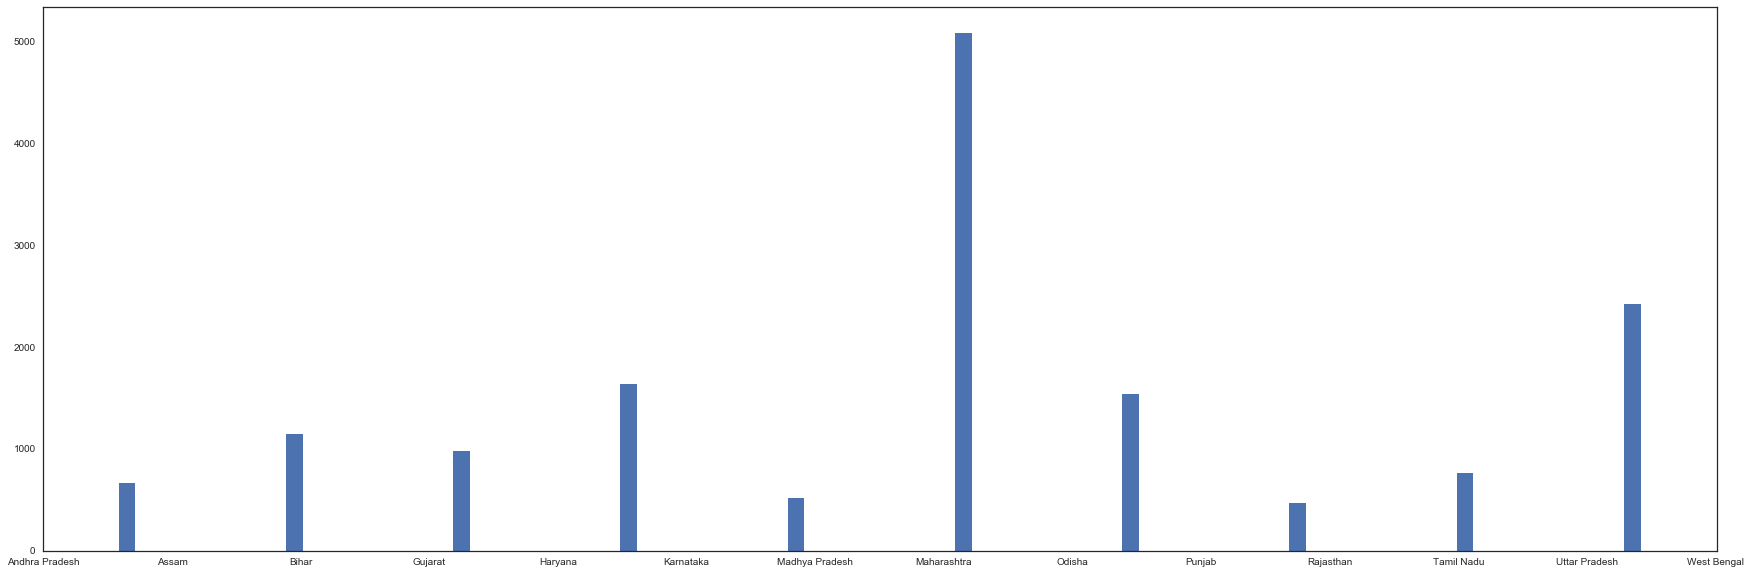

In [46]:
plt.figure(figsize=(30,10))
plt.hist(data_rjio['State Name'],histtype='bar',align = 'mid',rwidth = 0.1)
#plt.savefig("..\\plots\\bar20.png")

The above graph shows that majority of Jio users came from Maharashtra

## BSNL

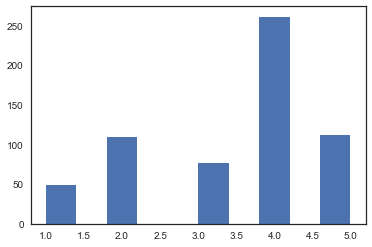

In [47]:
plt.hist(data_bsnl.Rating,histtype='bar')
#plt.savefig("..\\plots\\bar21.png")

This plot shows that majority of users have rated BSNL as 4 and thus there is still scope for improvement

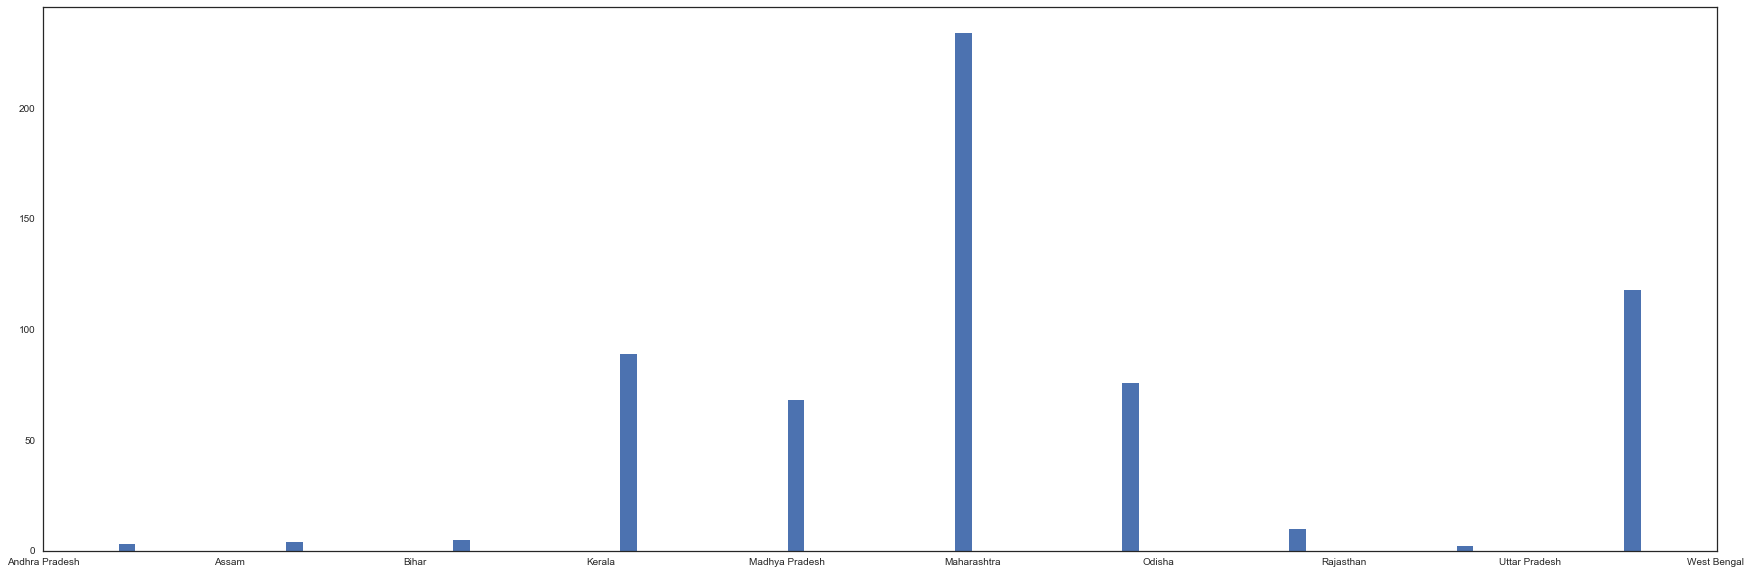

In [48]:
plt.figure(figsize=(30,10))
plt.hist(data_bsnl['State Name'],histtype='bar',align = 'mid',rwidth = 0.1)
#plt.savefig("..\\plots\\bar22.png")

The above plot depicts that majority of users come from Maharashra

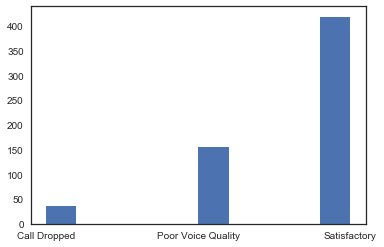

In [49]:
plt.hist(data_bsnl['Call Drop Category'],histtype='bar')
#plt.savefig("..\\plots\\bar23.png")

The above plot shows that majority of the calls were satifactory 

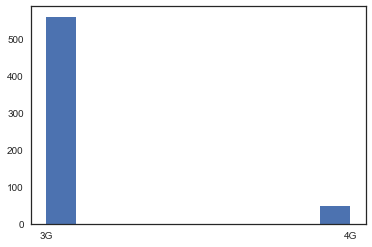

In [50]:
plt.hist(data_bsnl['Network Type'],histtype='bar')
#plt.savefig("..\\plots\\bar24.png")

In [ ]:
This plot shows that majority of BSNL users are 3G users 

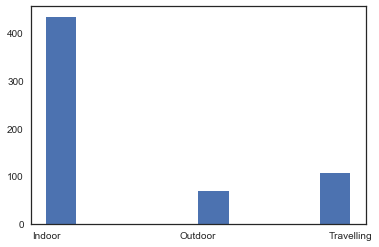

In [51]:
plt.hist(data_bsnl['In Out Travelling'],histtype='bar')
#plt.savefig("..\\plots\\bar25.png")

The above plot depicts that majority of the calls made by the BSNL users were indoors while calling.

## VODAFONE

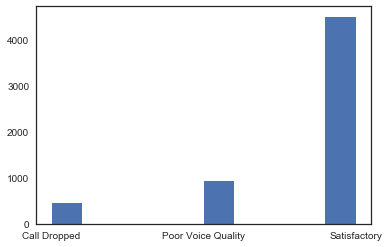

In [52]:
plt.hist(data_vodafone['Call Drop Category'],histtype='bar')
#plt.savefig("..\\plots\\bar26.png")

The above plot shows that majority of the users had satisfactory calling experience

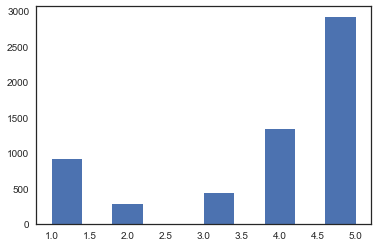

In [53]:
plt.hist(data_vodafone['Rating'],histtype='bar')
#plt.savefig("..\\plots\\bar27.png")

The above plot depicts majority if users are satisfied by the services provided by Vodafone.

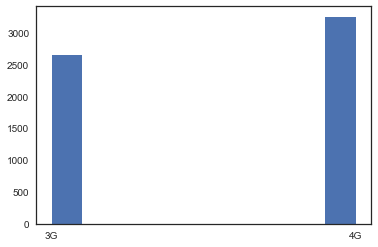

In [54]:
plt.hist(data_vodafone['Network Type'],histtype='bar')
#plt.savefig("..\\plots\\bar28.png")

The above plot shows that Vodafone has fairshare of both 3G and 4G users

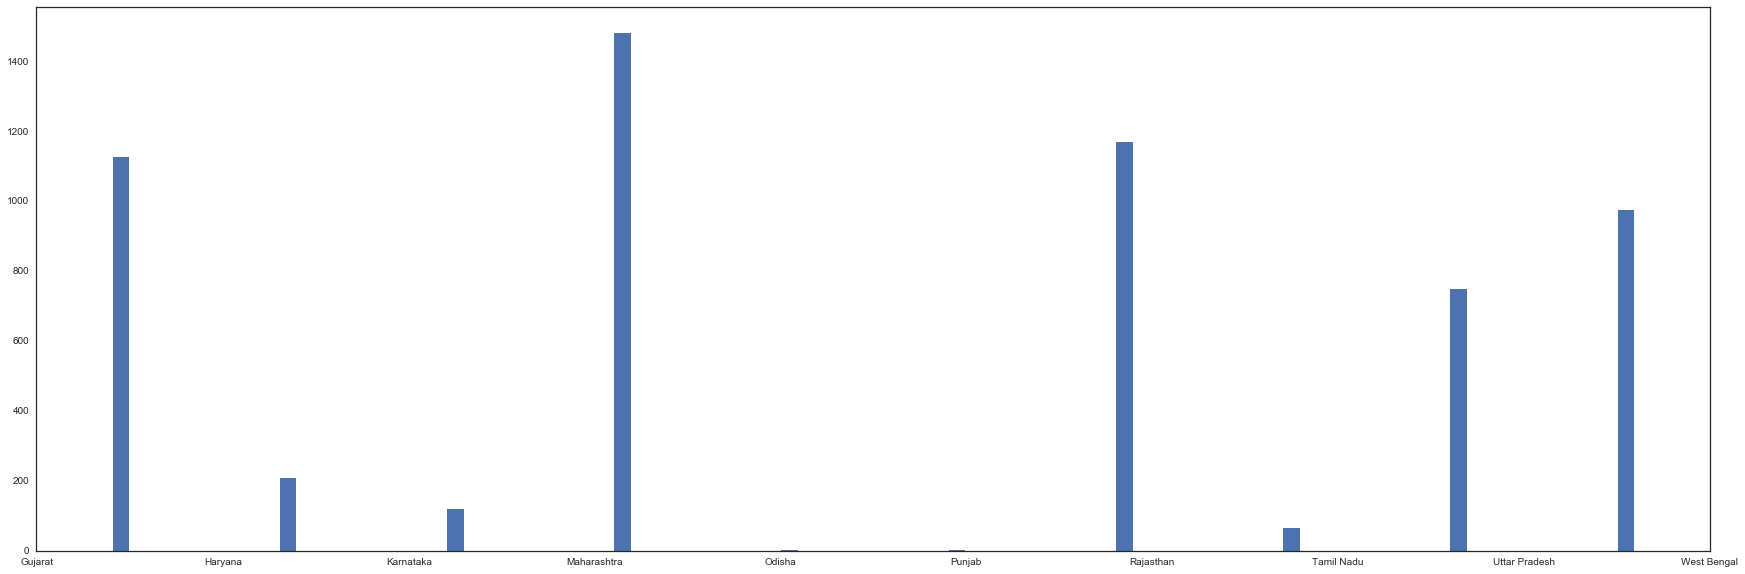

In [55]:
plt.figure(figsize=(30,10))
plt.hist(data_vodafone['State Name'],histtype='bar',align = 'mid',rwidth = 0.1)
#plt.savefig("..\\plots\\bar29.png")

The above plot shows that like other operators, Vodafone also has highest number of customers in Maharashtra as compared to all the other states. ALthough, unlike others Vodafone's customers are  fairly distributed across many states

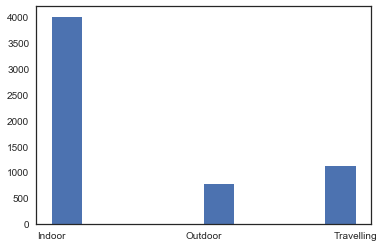

In [56]:
plt.hist(data_vodafone['In Out Travelling'],histtype='bar')
##plt.savefig("..\\plots\\bar30.png")

The above plot depicts that majority of the calls made by the Vodafone users were indoors while calling.

LINE HISTOGRAMS(for the distributions)

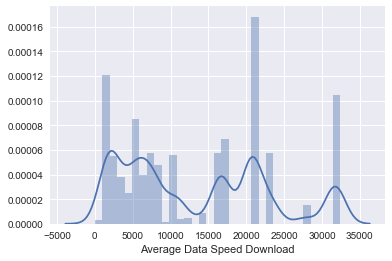

In [57]:
sns.set_style('darkgrid')
ax = sns.distplot(data['Average Data Speed Download'])
fig = ax.get_figure()
#fig.savefig("..\\plots\\gridplot1.png")

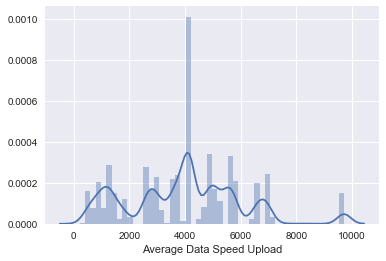

In [58]:
sns.set_style('darkgrid')
ax = sns.distplot(data['Average Data Speed Upload'])
fig = ax.get_figure()
#fig.savefig("..\\plots\\gridplot2.png")

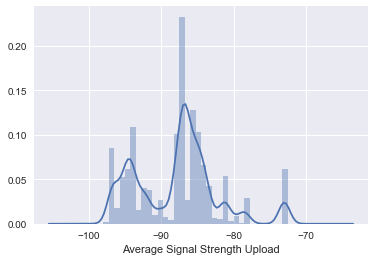

In [59]:
sns.set_style('darkgrid')
ax = sns.distplot(data['Average Signal Strength Upload'])
fig = ax.get_figure()
#fig.savefig("..\\plots\\gridplot3.png")

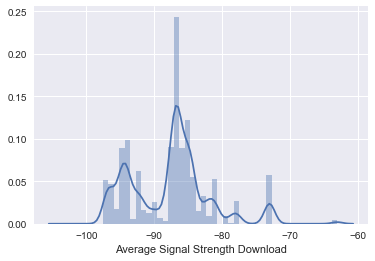

In [60]:
sns.set_style('darkgrid')
ax = sns.distplot(data['Average Signal Strength Download'])
fig = ax.get_figure()
#fig.savefig("..\\plots\\gridplot4.png")